In [1]:
# Probe.py
import sys
import os
from probeinterface import write_probeinterface

import probeinterface as pi
def tip_channel_location( ):
    import pandas as pd

# Load the Excel file
    file_path = '/media/ubuntu/sda/mouse_test/probe/tip_probe_0709.xlsx'
    excel_data = pd.read_excel(file_path)

# Display the first few rows of the Excel data to understand its structure
    excel_data.head()
# Display the first few rows of the Excel data to understand its structure
    print(excel_data.head())

# Extract and sort the coordinates by channel id in both sets
# Filter out rows where 'channel id' or 'channel id.1' might be NaN
    locations = []

# Process the first set of coordinates
    # this channel id is headstage id!!!!
    first_set = excel_data[['Contact_ID', 'X_um', 'Y_um']].dropna()
    first_coords = first_set[['X_um', 'Y_um']].values.tolist()


# Combine both sets of coordinates
    locations = first_coords
    return(locations)

def build_probe_tip():
    """
    构建并返回一个配置好的 Probe 对象
    """
    # 读取电极位置
    locations = tip_channel_location()
    print("Locations:", locations)

    # 设备上的物理通道索引
    device_channel_indices = [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29
    ]

    # 探针几何编号，用于 annotate 可视化
    contact_ids = [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 30, 29,
        28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16]


    # 创建 Probe 对象
    probe = pi.Probe(ndim=2)
    probe.set_contacts(
        positions=locations,
        shapes='circle',
        contact_ids=contact_ids,
        shape_params={'radius': 20}  # 单位：um
    )

    # 设置采集设备的物理通道映射
    probe.set_device_channel_indices(device_channel_indices)

    # 添加可视化标识
    probe.annotate(contact_ids=contact_ids)

    # 打印检查
    print("Probe:", probe)
    print("Probe positions:", probe.contact_ids)
    return probe


def tetrode_channel_location( ):
    import pandas as pd

# Load the Excel file
    file_path = '/media/ubuntu/sda/mouse_test/probe/tetrodelike_probe_0709.xlsx'
    excel_data = pd.read_excel(file_path)

# Display the first few rows of the Excel data to understand its structure
    excel_data.head()
# Display the first few rows of the Excel data to understand its structure
    print(excel_data.head())

# Extract and sort the coordinates by channel id in both sets
# Filter out rows where 'channel id' or 'channel id.1' might be NaN
    locations = []

# Process the first set of coordinates
    # this channel id is headstage id!!!!
    first_set = excel_data[['Contact_ID', 'X_um', 'Y_um']].dropna()
    first_coords = first_set[['X_um', 'Y_um']].values.tolist()


# Combine both sets of coordinates
    locations = first_coords
    return(locations)

def build_probe_tetrode():
    """
    构建并返回一个配置好的 Probe 对象
    """
    # 读取电极位置
    locations = tetrode_channel_location()
    print("Locations:", locations)

    # 设备上的物理通道索引
    device_channel_indices = [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29
    ]

    # 探针几何编号，用于 annotate 可视化
    contact_ids = [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
        31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


    # 创建 Probe 对象
    probe = pi.Probe(ndim=2)
    probe.set_contacts(
        positions=locations,
        shapes='circle',
        contact_ids=contact_ids,
        shape_params={'radius': 17.5}  # 单位：um
    )

    # 设置采集设备的物理通道映射
    probe.set_device_channel_indices(device_channel_indices)

    # 添加可视化标识
    probe.annotate(contact_ids=contact_ids)

    # 打印检查
    print("Probe:", probe)
    print("Probe positions:", probe.contact_ids)
    return probe

In [ ]:
probe = build_probe_tip()
from probeinterface.plotting import plot_probe
plot_probe(probe)  # 可视化检查
write_probeinterface('tip_probe.json', probe)

   Contact_ID  X_um   Y_um
0           0     0    0.0
1           1     0   62.0
2           2     0  124.0
3           3    62  124.0
4           4    62   62.0
Locations: [[0.0, 0.0], [0.0, 62.0], [0.0, 124.0], [62.0, 124.0], [62.0, 62.0], [62.0, 0.0], [70.0, 216.2167], [70.0, 278.2167], [70.0, 340.2167], [132.0, 340.2167], [132.0, 278.2167], [132.0, 216.2167], [140.0, -179.5576], [140.0, -117.5576], [140.0, -55.5576], [342.0, 0.0], [342.0, 62.0], [342.0, 124.0], [280.0, 124.0], [280.0, 62.0], [280.0, 0.0], [272.0, 216.2167], [272.0, 278.2167], [272.0, 340.2167], [210.0, 340.2167], [210.0, 278.2167], [210.0, 216.2167], [202.0, -179.5576], [202.0, -117.5576], [202.0, -55.5576]]
Probe: Probe - 30ch - 1shanks
Probe positions: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '31'
 '30' '29' '28' '27' '26' '25' '24' '23' '22' '21' '20' '19' '18' '17']


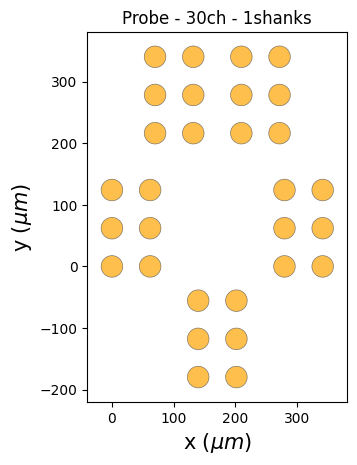

In [4]:
probe = build_probe_tetrode()
from probeinterface.plotting import plot_probe
plot_probe(probe)  # 可视化检查
write_probeinterface('tetrode_probe.json', probe)